In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import numpy.linalg as lin

### Importing uci automobile dataset 
Data is read from 'automobile.csv' in pandas dataframe 'cdata'. And then adding header to dataframe from 'header'

In [2]:
#importing dataset
cdata = pd.read_csv("automobile.csv",header=None) 
# Adding header to dataset
header = ['symboling', 'normalized_losses', 'make', 'fuel_type', 'aspiration', 'num_of_doors', 'body_style', 'drive_wheels', 'engine_location', 'wheel_base', 'length', 'width', 'height', 'curb-weight', 'engine_type', 'num_of_cylinders', 'engine_size', 'fuel_system', 'bore', 'stroke', 'compression_ratio', 'horsepower', 'peak_rpm', 'city_mpg', 'highway_mpg', 'price']
cdata.to_csv("dcdata.csv", header=header, index=False)
cdata = pd.read_csv("dcdata.csv") 
cdata.head(3)

,symboling,normalized_losses,make,fuel_type,aspiration,num_of_doors,body_style,drive_wheels,engine_location,wheel_base,...,engine_size,fuel_system,bore,stroke,compression_ratio,horsepower,peak_rpm,city_mpg,highway_mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500


### Data Preprocessing
For this problem we are only taking numeric data so dropping all feature which are not numeric.

In [3]:
#DROP SOME FEATURE
droplist = ['symboling','make','fuel_type','aspiration','num_of_doors','drive_wheels','engine_location','engine_type','num_of_cylinders','fuel_system','body_style']
cdata = cdata.drop(droplist,axis=1)

#### Missing Value
Missing value is written as '?' in the dataset. So we will replace this '?' to numpy.nan value so we can handel missing value.

In [4]:
#replace all ? in missing value to NAN
cdata = cdata.replace('?', np.nan)
print("Number of Missing value per feature:")
cdata.isnull().sum()

Number of Missing value per feature:


normalized_losses    41
wheel_base            0
length                0
width                 0
height                0
curb-weight           0
engine_size           0
bore                  4
stroke                4
compression_ratio     0
horsepower            2
peak_rpm              2
city_mpg              0
highway_mpg           0
price                 4
dtype: int64

Now after finding feature which have missing value. Missing value will be replaced by avg

In [5]:
#cdata.dtypes
# list of attribe which have missing value
list = ['normalized_losses', 'bore', 'stroke', 'horsepower', 'peak_rpm', 'price']
#correcting datatype for above list 
cdata[list]=cdata[list].astype(float)
cdata.dtypes

normalized_losses    float64
wheel_base           float64
length               float64
width                float64
height               float64
curb-weight            int64
engine_size            int64
bore                 float64
stroke               float64
compression_ratio    float64
horsepower           float64
peak_rpm             float64
city_mpg               int64
highway_mpg            int64
price                float64
dtype: object

In [6]:
#Replacing missing value with mean
for i in list:
    mean=cdata[i].mean()
    cdata[i].fillna(value=mean, inplace=True)
    
print("Number of Missing value after replacing with mean:")
cdata.isnull().sum()    

Number of Missing value after replacing with mean:


normalized_losses    0
wheel_base           0
length               0
width                0
height               0
curb-weight          0
engine_size          0
bore                 0
stroke               0
compression_ratio    0
horsepower           0
peak_rpm             0
city_mpg             0
highway_mpg          0
price                0
dtype: int64

#### Data Normalization
All the data is normalized using min max normalization.

In [7]:
# Data Normalization with min max normalization except price
normalized_cdata = (cdata- cdata.min())/(cdata.max() - cdata.min())
normalized_cdata['price'] = cdata['price']

In [8]:
normalized_cdata.head(3)

,normalized_losses,wheel_base,length,width,height,curb-weight,engine_size,bore,stroke,compression_ratio,horsepower,peak_rpm,city_mpg,highway_mpg,price
0,0.298429,0.058309,0.413433,0.316667,0.083333,0.411171,0.260377,0.664286,0.290476,0.125,0.262500,0.346939,0.222222,0.289474,13495.0
1,0.298429,0.058309,0.413433,0.316667,0.083333,0.411171,0.260377,0.664286,0.290476,0.125,0.262500,0.346939,0.222222,0.289474,16500.0
2,0.298429,0.230321,0.449254,0.433333,0.383333,0.517843,0.343396,0.100000,0.666667,0.125,0.441667,0.346939,0.166667,0.263158,16500.0


__split data into training testing and validation set__

In [9]:
#data without normalization
#XY = cdata
XY = normalized_cdata

In [10]:
def testTrainSplit(XY):
    '''
    This funtion split data into Train and test set
    XY --> df
    return --> df,df
    '''
    XY_rnd = XY.sample(205)
    XY_Train = XY_rnd[:164]
    XY_Test = XY_rnd[164:]
    return XY_Train, XY_Test

def testValidationSplit(XY):
    '''
    This funtion split train data into Train and validation set
    XY --> df
    return --> df,df
    '''
    XY_rnd = XY.sample(164)
    XY_Train = XY_rnd[:132]
    XY_Val = XY_rnd[132:]
    return XY_Train, XY_Val

# KNN

In [11]:
def kNN(K, X, dataPoint):
    '''
    This funtion find K-Nearest Neighbors
    K --> int
    X --> np.array
    dataPoint --> np.array
    return ---> list
    '''
    #list to add distance of every point
    listNN = []
    # for every point in training data we calculate distance by L2 norm and add it in list
    for i in range(len(X)):
        listNN.append([i, lin.norm( X[i] - dataPoint, 2 ) ])
    #sorting the list to find nearest point.
    listNN.sort(key = lambda x: x[1])
  
    #sending K nearest point distance
    return listNN[:K]

In [12]:
#KNN regression
def kNN_Regression(K,XY_train,DP):
    '''
    This funtion predict price for given datapoint DP using KNN.
    It predict value for point in a 'Batch' 
    K : int 
    XY_train:df 
    DP:df
    return --> list
    '''
    NN = []
    # predicted price list
    price_list = []
    # price list of training data
    price_train = XY_train['price'].values.tolist()
    price_dp = DP['price'].values.tolist()
    
    # Removing lable ie price 
    X_train = np.array(XY_train.drop('price',axis=1))
    DP = np.array(DP.drop('price',axis=1))
    
    #call kNN for all datapoint to predict
    for dp in DP:
        NN.append( kNN(K,X_train,dp) )
        
    # Taking price for all KNN and taking mean to predict price for datapoint    
    for i in NN:
        price = 0
        for j in i:
            price += price_train[j[0]]
        price_avg = price / K
        price_list.append(price_avg)
    return price_list
    
    

# __Q1 a__

In [13]:
#split data into test validation and test set
XY_Trv, XY_Test = testTrainSplit(XY)
XY_Train, XY_Val = testValidationSplit(XY)
print('XY_Train size : {}'.format(XY_Train.shape))
print('XY_Val size : {}'.format(XY_Val.shape))
print('XY_Test size : {}'.format(XY_Test.shape))


XY_Train size : (132, 15)
XY_Val size : (32, 15)
XY_Test size : (41, 15)


In [14]:
# Funtion to find root mean squared error (RMSE) for validation set of size 32 datapoint
def RMSE(actual_price,predicted_price):
    return np.sqrt( np.sum( np.square(actual_price - predicted_price) ) / 32 )

# Funtion to find normalized root mean squared error (NRMSE) for validation set of size 32 datapoint
def NRMSE(actual_price,predicted_price):
    pmax = actual_price.max()
    pmin = actual_price.min()
    rmse = RMSE(actual_price,predicted_price)
    nrmse = rmse/(pmax-pmin)
    return nrmse*100


In [15]:
# Finnding RMSE for validation set
K = 2
actual_price = XY_Val['price'].values.tolist()
predicted_price = kNN_Regression(K,XY_Train,XY_Val)

actual_price = np.array(actual_price)
predicted_price = np.array(predicted_price)
    
rmse = RMSE(actual_price,predicted_price)
nrmse = NRMSE(actual_price,predicted_price)

print('For K = {} RMSE  is : {}'.format(K,rmse))

print('For K = {} NRMSE is : {} %'.format(K,nrmse))


For K = 2 RMSE  is : 4181.082495710591
For K = 2 NRMSE is : 13.134428095720136 %


# Q1 B

In [16]:
# Finding RMSE for K value ranging from 1 to 10 
def crossVal(XY_Train, XY_Val):
    
    actual_price = XY_Val['price'].values.tolist()
    actual_price = np.array(actual_price)
    
    # list for rmse
    k_rmse_list = [0]*10
    
    # for k value from 1 to 10 
    # find rmse and add it in the list
    for K in range(1,11):
        predicted_price = kNN_Regression(K,XY_Train,XY_Val)
        predicted_price = np.array(predicted_price)
        rmse = RMSE(actual_price,predicted_price)
        k_rmse_list[K-1] = rmse 
    
    #return error list
    return k_rmse_list
        

In [17]:
# N Fold cross validation 
# It takes random validation set for N time. Calculate it's RMSE and send avg RMSE
def nFoldCrossVal(n,XY_Trv):
    errorlist = np.array([0.]*10)
    for i in range(n):
        XY_Train, XY_Val = testValidationSplit(XY)
        errorlist += np.array( crossVal(XY_Train, XY_Val) )
    return errorlist/n
    

In [18]:
#finding optimal value of K using cross validation.
# N fold cross validation with n=5
k_rmse = nFoldCrossVal(5,XY_Trv)

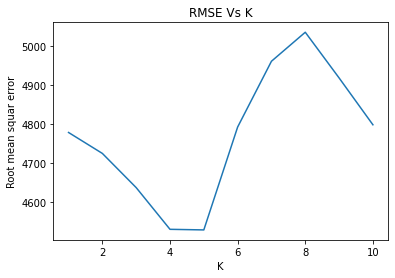

In [19]:
#graph RMSE Vs K
x = np.array([1, 2, 3, 4, 5, 6, 7, 8, 9, 10])
y = k_rmse
  
plt.plot(x, y)
plt.xlabel("K")
plt.ylabel("Root mean squar error")  
plt.title("RMSE Vs K")  
plt.show()

__Based on above graph we can consider optimal K value to be 4-5__

## Q2

### Importing uci Census Income Data Set 
Data is read from 'adult.csv' in pandas dataframe 'adata'. And then adding header to dataframe from 'header'

In [20]:
#importing dataset
adata = pd.read_csv("adult.csv",header=None) 
# Adding header to dataset
header = ['age', 'workclass' , 'fnlwgt' , 'education' , 'education_num' , 'marital_status' , 'occupation' , 'relationship' , 'race', 'sex' , 'capital_gain' , 'capital_loss' , 'hours_per_week' , 'native_country' , 'class']
adata.to_csv("adata_.csv", header=header, index=False)
adata = pd.read_csv("adata_.csv") 
print("Total Records  : {} \nTotal Features : {}".format(adata.shape[0],adata.shape[1]))
adata.head(3)

Total Records  : 32561 
Total Features : 15


,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,class
0,90,?,77053,HS-grad,9,Widowed,?,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,66,?,186061,Some-college,10,Widowed,?,Unmarried,Black,Female,0,4356,40,United-States,<=50K


#### Data Preprocessing

#### Missing value
Missing value is written as '?' in the dataset. So we will replace this '?' to numpy.nan value so we can handel missing value.

In [21]:
#missing value
#replace all ? in missing value to NAN
adata = adata.replace('?', np.nan)
print("Number of Missing value per feature:")
adata.isnull().sum()

Number of Missing value per feature:


age                  0
workclass         1836
fnlwgt               0
education            0
education_num        0
marital_status       0
occupation        1843
relationship         0
race                 0
sex                  0
capital_gain         0
capital_loss         0
hours_per_week       0
native_country     583
class                0
dtype: int64

_As all the missing attribute are non numeric. Delete data which have any missing value_

In [22]:
# list of attribe which have missing value
missinglist = ['workclass', 'occupation', 'native_country']
adata = adata.dropna(subset=missinglist)
#data after dropping missing value
adata.shape

(30162, 15)

#### Data Normalization

In [23]:
# Data Normalization with min max normalization except price
normalized_adata = adata
list = ['age','fnlwgt','education_num', 'capital_gain', 'capital_loss']
normalized_adata[list] = (adata[list]- adata[list].min())/(adata[list].max() - adata[list].min())

In [24]:
normalized_adata.head(3)

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,class
1,0.890411,Private,0.080970,HS-grad,0.533333,Widowed,Exec-managerial,Not-in-family,White,Female,0.0,1.000000,18,United-States,<=50K
3,0.506849,Private,0.086061,7th-8th,0.200000,Divorced,Machine-op-inspct,Unmarried,White,Female,0.0,0.895317,40,United-States,<=50K
4,0.328767,Private,0.170568,Some-college,0.600000,Separated,Prof-specialty,Own-child,White,Female,0.0,0.895317,40,United-States,<=50K
